This dataset comes from ***UC Irvine Machine Learning Repository*** and has 14 features. The 'target' feature refers to the presence of heart disease for the patient. It is binary classed with 0 (heart disease) and 1 (no heart disease).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Columns meaning

**cp:** chest pain type:<br>
- Value 0: asymptomatic 
- Value 1: atypical angina 
- Value 2: non-anginal pain
- Value 3: typical angina<br>

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)<br>

**fbs (fasting blood pressure):** glycémie à jeun; fbs > 1.20g/L (0=no diabetes, 1=likely have diabetes)

**restecg:** resting electrocardiographic results<br>
- Value 0: showing probable or definite left ventricular hypertrophy by Estes'criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of 0.05 mV)<br>

**thalach:** maximum heart rate achieved (normal heart rate should be between 60 and 100 beats per minute at rest)

**exang:** exercise induced angina (1=yes; 0=no)<br>

**oldpeak:**ST depression induced by exercise relative to rest<br>

**slope:** the slope of the peak exercise ST segment<br>
0: downsloping; 1: flat; 2: upsloping<br>

**Thal (Thalium, a radioactive tracer injected during a stress test):**<br>
1: fixed defect; 2: normal; 3: reversable defect<br>
A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a **"reversible defect"**. Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a **"fixed defect"**.<br>

**target:** 0: disease; 1: no disease

# Data cleaning

In [6]:
#Lines 93, 139, 164, 165 and 252 have ca values of 1,3 and 4 whereas in the original dataset, they are NaNs
#Lines 49 and 282 have thal values of 0 and 1, whereas they are NaNs in the original dataset
dataset.iloc[[49,93,139,164,165,252,282]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


In [7]:
#Drop these lines
dataset.drop([49,93,139,164,165,252,282],axis=0,inplace=True)

In [8]:
dataset.shape

(296, 14)


# EDA

In [9]:
by_target = dataset.groupby(by='target')

In [10]:
by_target.mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.466667,0.829630,0.474074,134.244444,250.755556,0.148148,0.444444,139.614815,0.555556,1.579259,1.170370,1.140741,2.562963
1,52.503106,0.565217,1.391304,129.186335,242.285714,0.136646,0.596273,158.695652,0.130435,0.596273,1.590062,0.335404,2.118012


(14.5, -0.5)

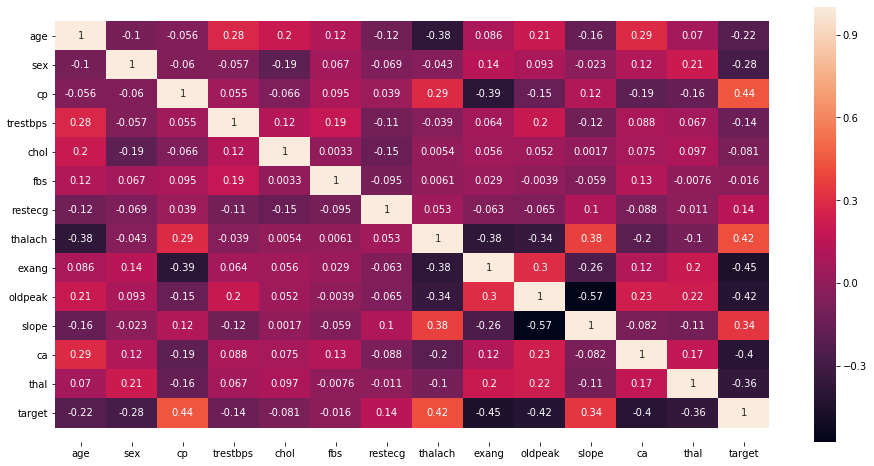

In [11]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(dataset.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

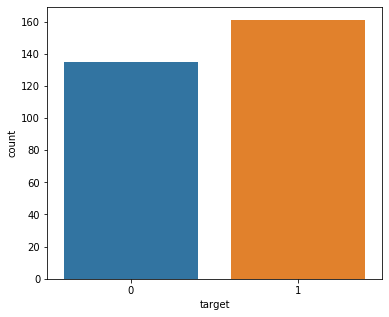

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(dataset['target'])

In [13]:
print(f"Number of diseased people: {dataset[dataset['target']==0]['target'].count()}")
print(f"Number of non diseased people: {dataset[dataset['target']==1]['target'].count()}")

Number of diseased people: 135
Number of non diseased people: 161


### Relation between Age and target

#### Diseased people are generally **older**

55.0


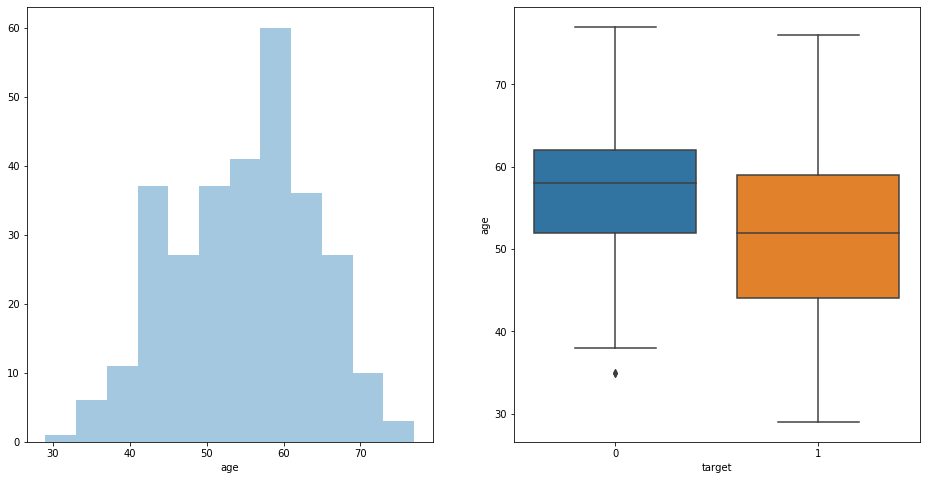

In [14]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.distplot(dataset['age'],kde=False)

plt.subplot(1,2,2)
sns.boxplot(x=dataset['target'],y=dataset['age'])

print(dataset['age'].median())

Text(0.5, 0, 'AGE')

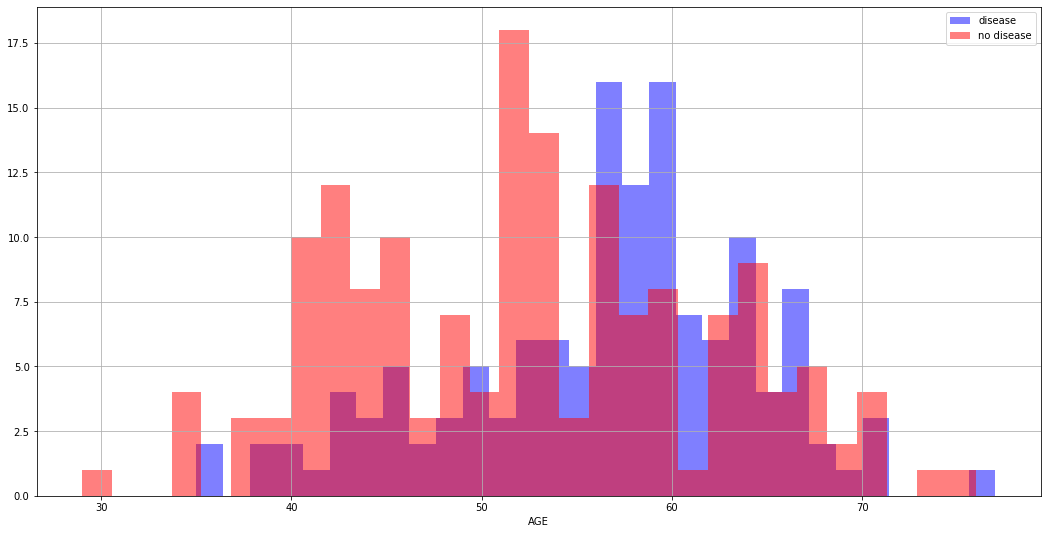

In [15]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='disease')
dataset[dataset['target']==1]['age'].hist(alpha=0.5,color='red',
                                              bins=30,label='no disease')

plt.legend()
plt.xlabel('AGE')

### Relation between Sex and target

#### Males most likely develop heart diseases more than women

Text(0.5, 0, 'SEX')

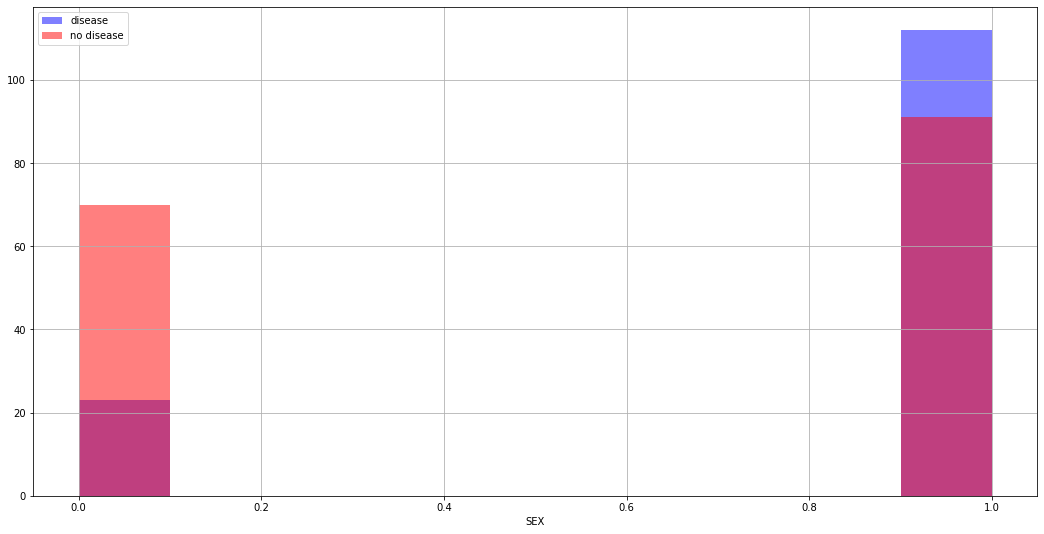

In [16]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['sex'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['sex'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('SEX')

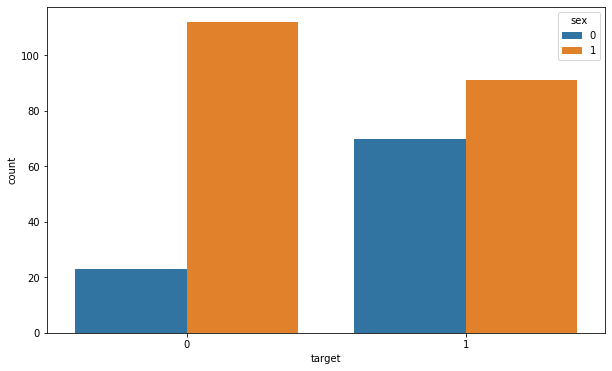

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=dataset['target'],hue=dataset['sex'])

### Relation between Chest Pain type and target

#### People with **asymptomatic** chest pain have higher probability to have a heart disease.

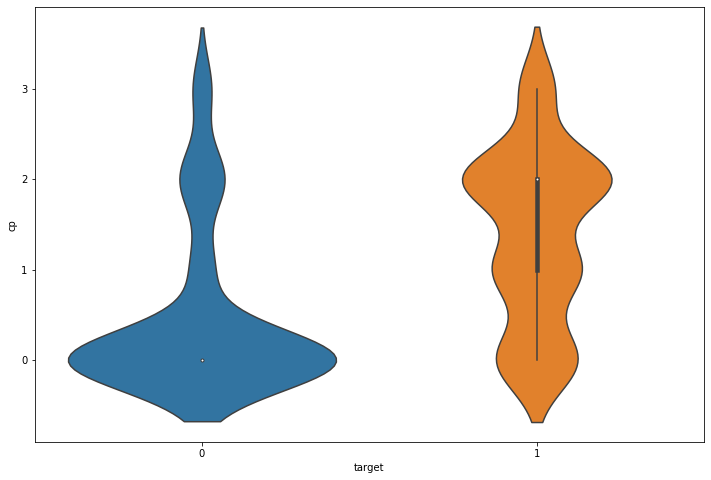

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(x=dataset['target'],y=dataset['cp'])

Text(0.5, 0, 'Chest Pain')

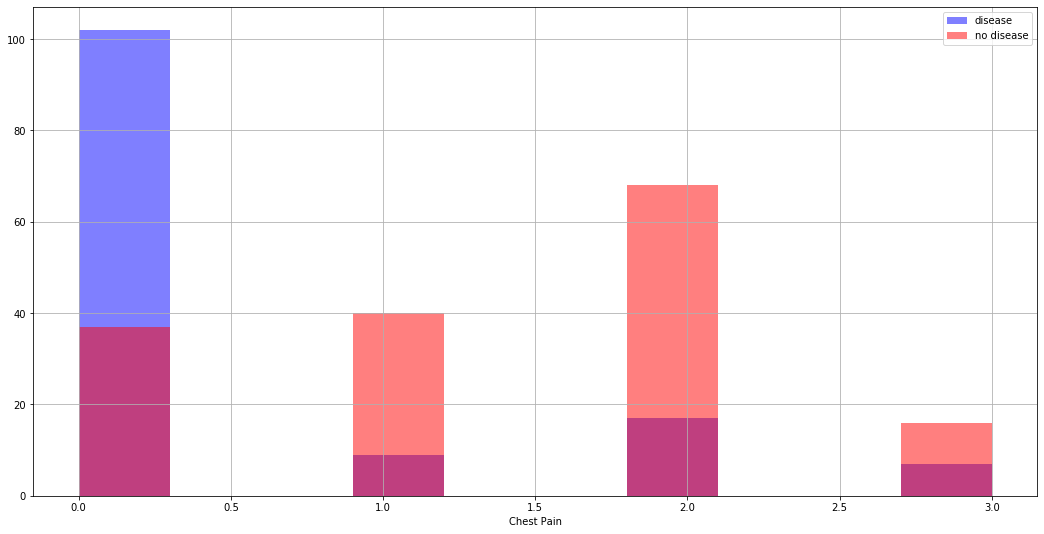

In [19]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['cp'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['cp'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('Chest Pain')

### Relation between chol and target

#### Diseased people have a slightly **higher** cholesterol rate.

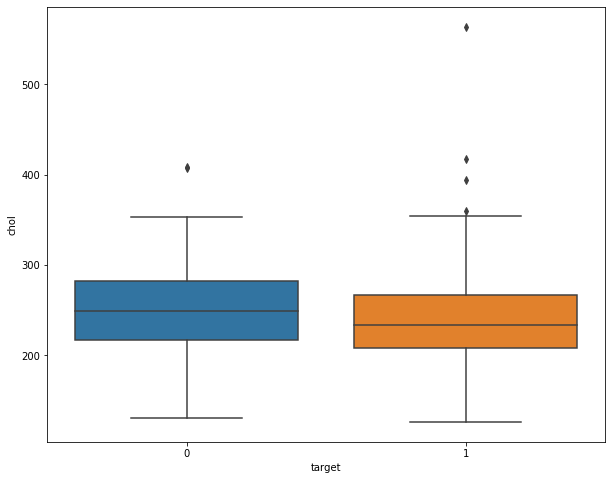

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(x=dataset['target'],y=dataset['chol'])

Text(0.5, 0, 'Chol')

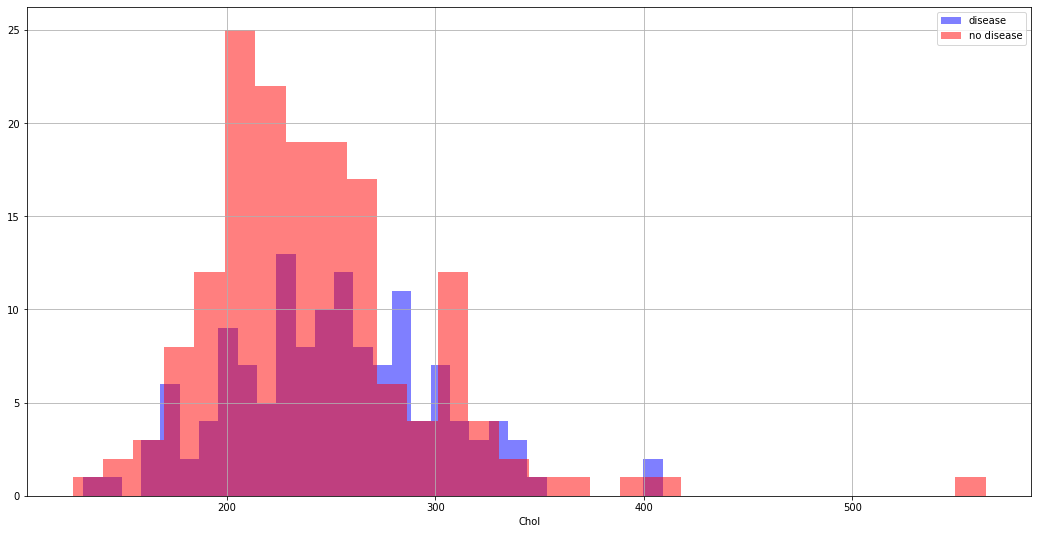

In [21]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['chol'].hist(alpha=0.5,color='blue',
                                              bins=30,label='disease')
dataset[dataset['target']==1]['chol'].hist(alpha=0.5,color='red',
                                              bins=30,label='no disease')

plt.legend()
plt.xlabel('Chol')

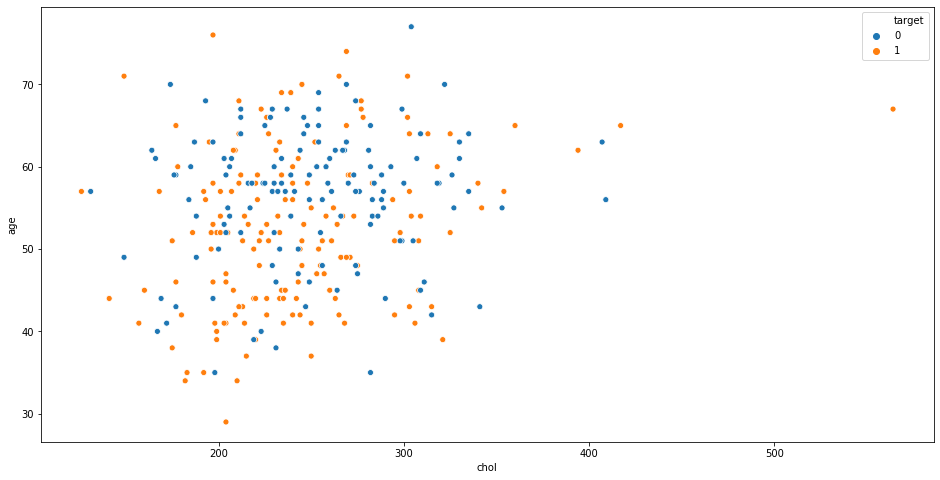

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=dataset['chol'],y=dataset['age'],hue=dataset['target'])

In [23]:
dataset[dataset['chol'] > 500]['chol']

85    564
Name: chol, dtype: int64

**Should the point which value is higher than 500 mg/dL be considered as an outlier?**<br>
No, because after discussion with a surgeon, an individual can have a high cholesterol without having any heart disease, 
this depends on how long does he have such a high rate

### Relation between Fasting Blood Pressure and target

#### **No real relation between these two**

Text(0.5, 0, 'Fasting Blood Pressure')

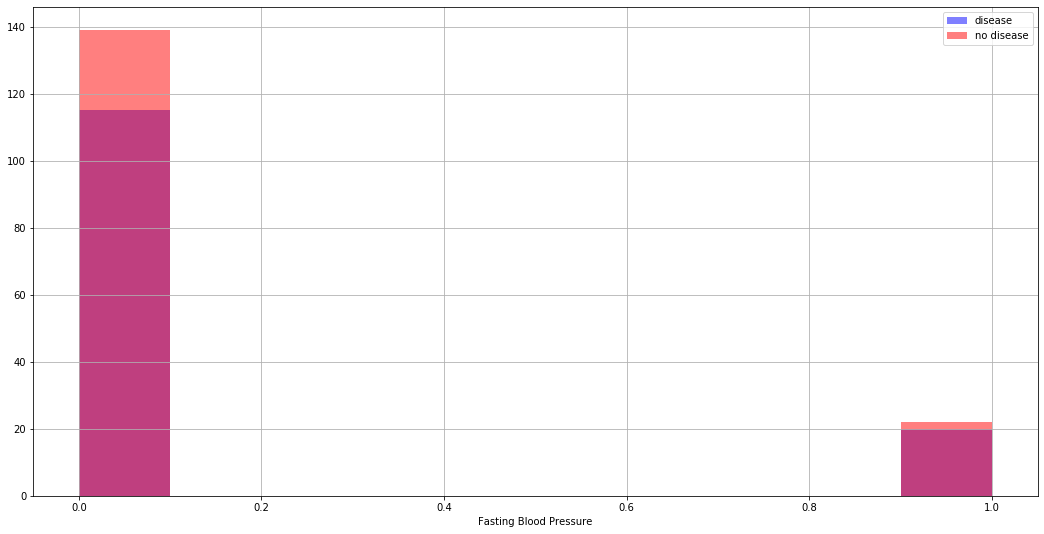

In [24]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['fbs'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['fbs'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('Fasting Blood Pressure')

### Relation between the Heart Rate and target

#### Diseased people have a **lower** heart rate after exercising.

Text(0.5, 0, 'Heart Rate')

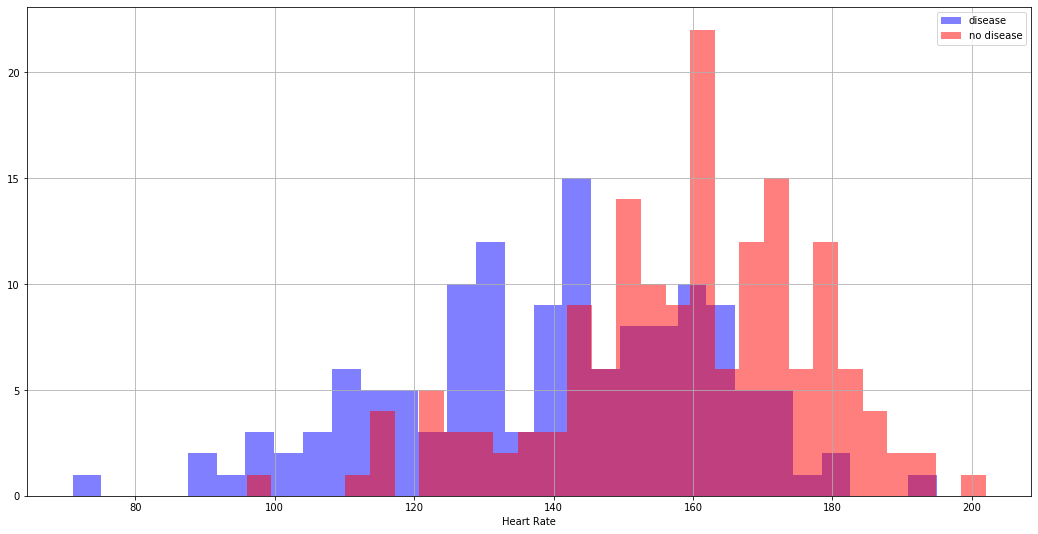

In [25]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['thalach'].hist(alpha=0.5,color='blue',
                                              bins=30,label='disease')
dataset[dataset['target']==1]['thalach'].hist(alpha=0.5,color='red',
                                              bins=30,label='no disease')

plt.legend()
plt.xlabel('Heart Rate')

### Relation between exang and target

#### Non diseased people **don't get angina** after exercising.

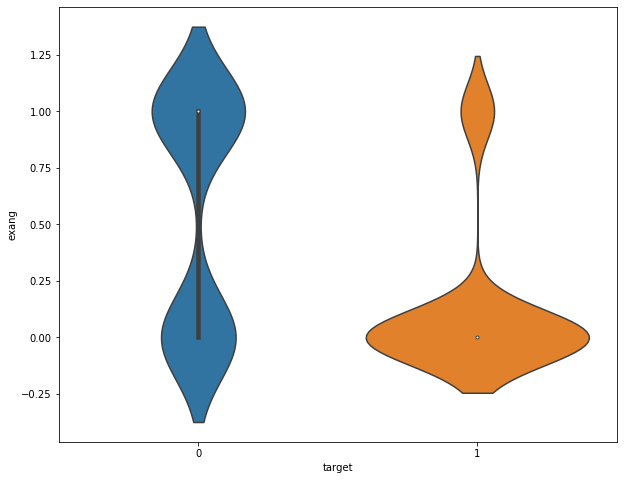

In [26]:
plt.figure(figsize=(10,8))

sns.violinplot(x=dataset['target'],y=dataset['exang'])

Text(0.5, 0, 'Exercise induced Angina')

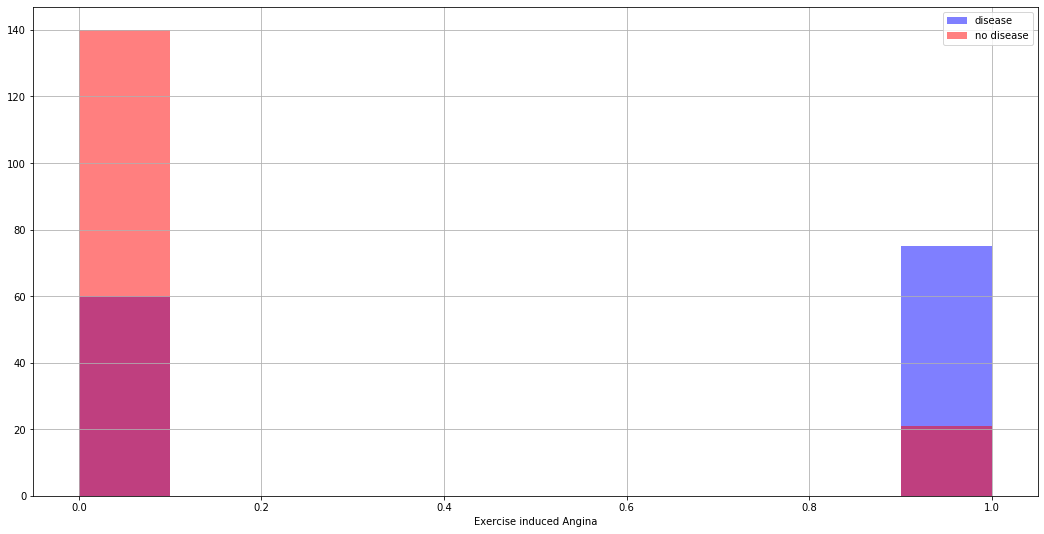

In [27]:
plt.figure(figsize=(18,9))
dataset[dataset['target']==0]['exang'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['exang'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('Exercise induced Angina')

### Relation between oldpeak, slope and target

#### People with **flat slopes** on the ECG are most likely heart diseased

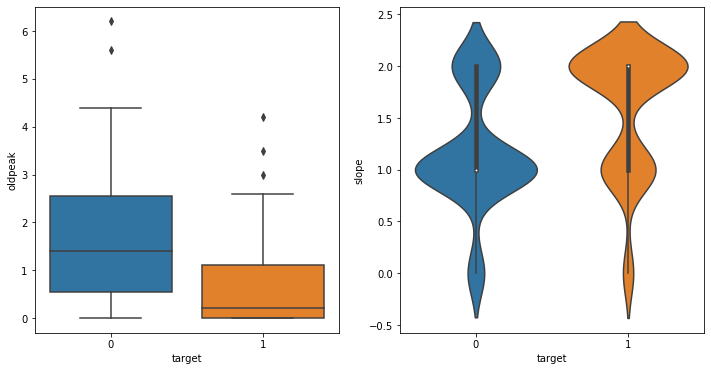

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x=dataset['target'],y=dataset['oldpeak'])

plt.subplot(1,2,2)
sns.violinplot(x=dataset['target'],y=dataset['slope'])

Text(0.5, 0, 'SLOPE')

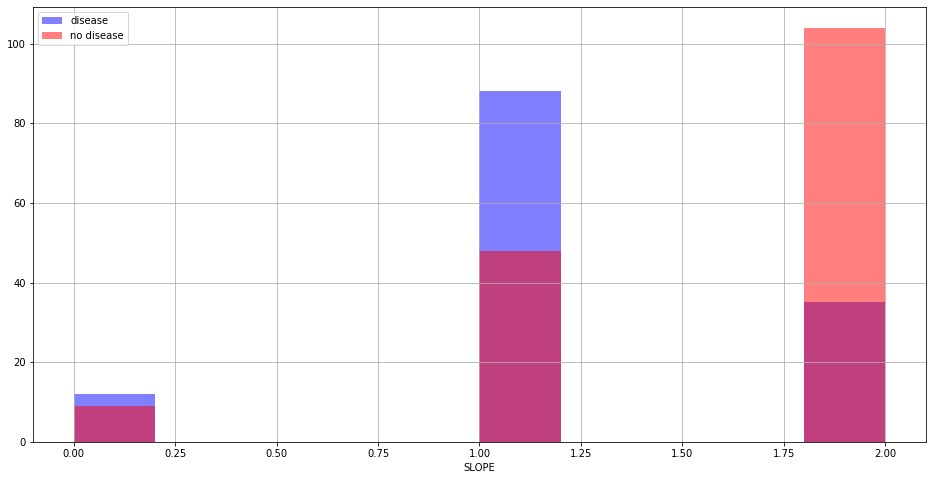

In [29]:
plt.figure(figsize=(16,8))
dataset[dataset['target']==0]['slope'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['slope'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('SLOPE')

### Relation between thal and target

#### A thal value of **3** indicates a high probability of heart disease.

Text(0.5, 0, 'Thalium, Rradioactive tracer injected during a stress test')

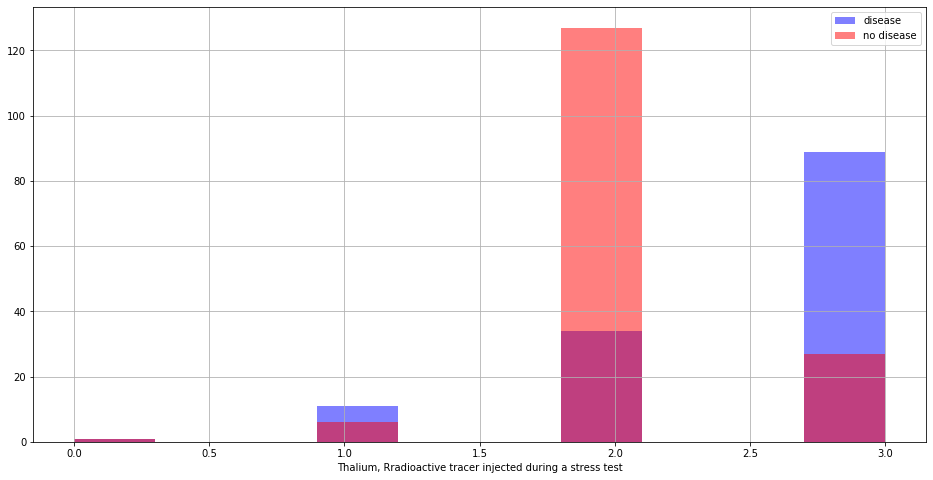

In [30]:
plt.figure(figsize=(16,8))
dataset[dataset['target']==0]['thal'].hist(alpha=0.5,color='blue',
                                              label='disease')
dataset[dataset['target']==1]['thal'].hist(alpha=0.5,color='red',
                                              label='no disease')

plt.legend()
plt.xlabel('Thalium, Rradioactive tracer injected during a stress test')

In [31]:
#Find out outliers
dataset[dataset['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [32]:
#Replacing the 'thal' value in line 48 by 2 because this person is not heart diseased and is a female with a slope of 2 
#Replacing the 'thal' value in line 281 by 3 because this person is heart diseased and is a male with a slope of 1 
dataset.loc[(dataset['thal'] == 0) & (dataset['target'] == 1), 'thal'] = 2
dataset.loc[(dataset['thal'] == 0) & (dataset['target'] == 0), 'thal'] = 3

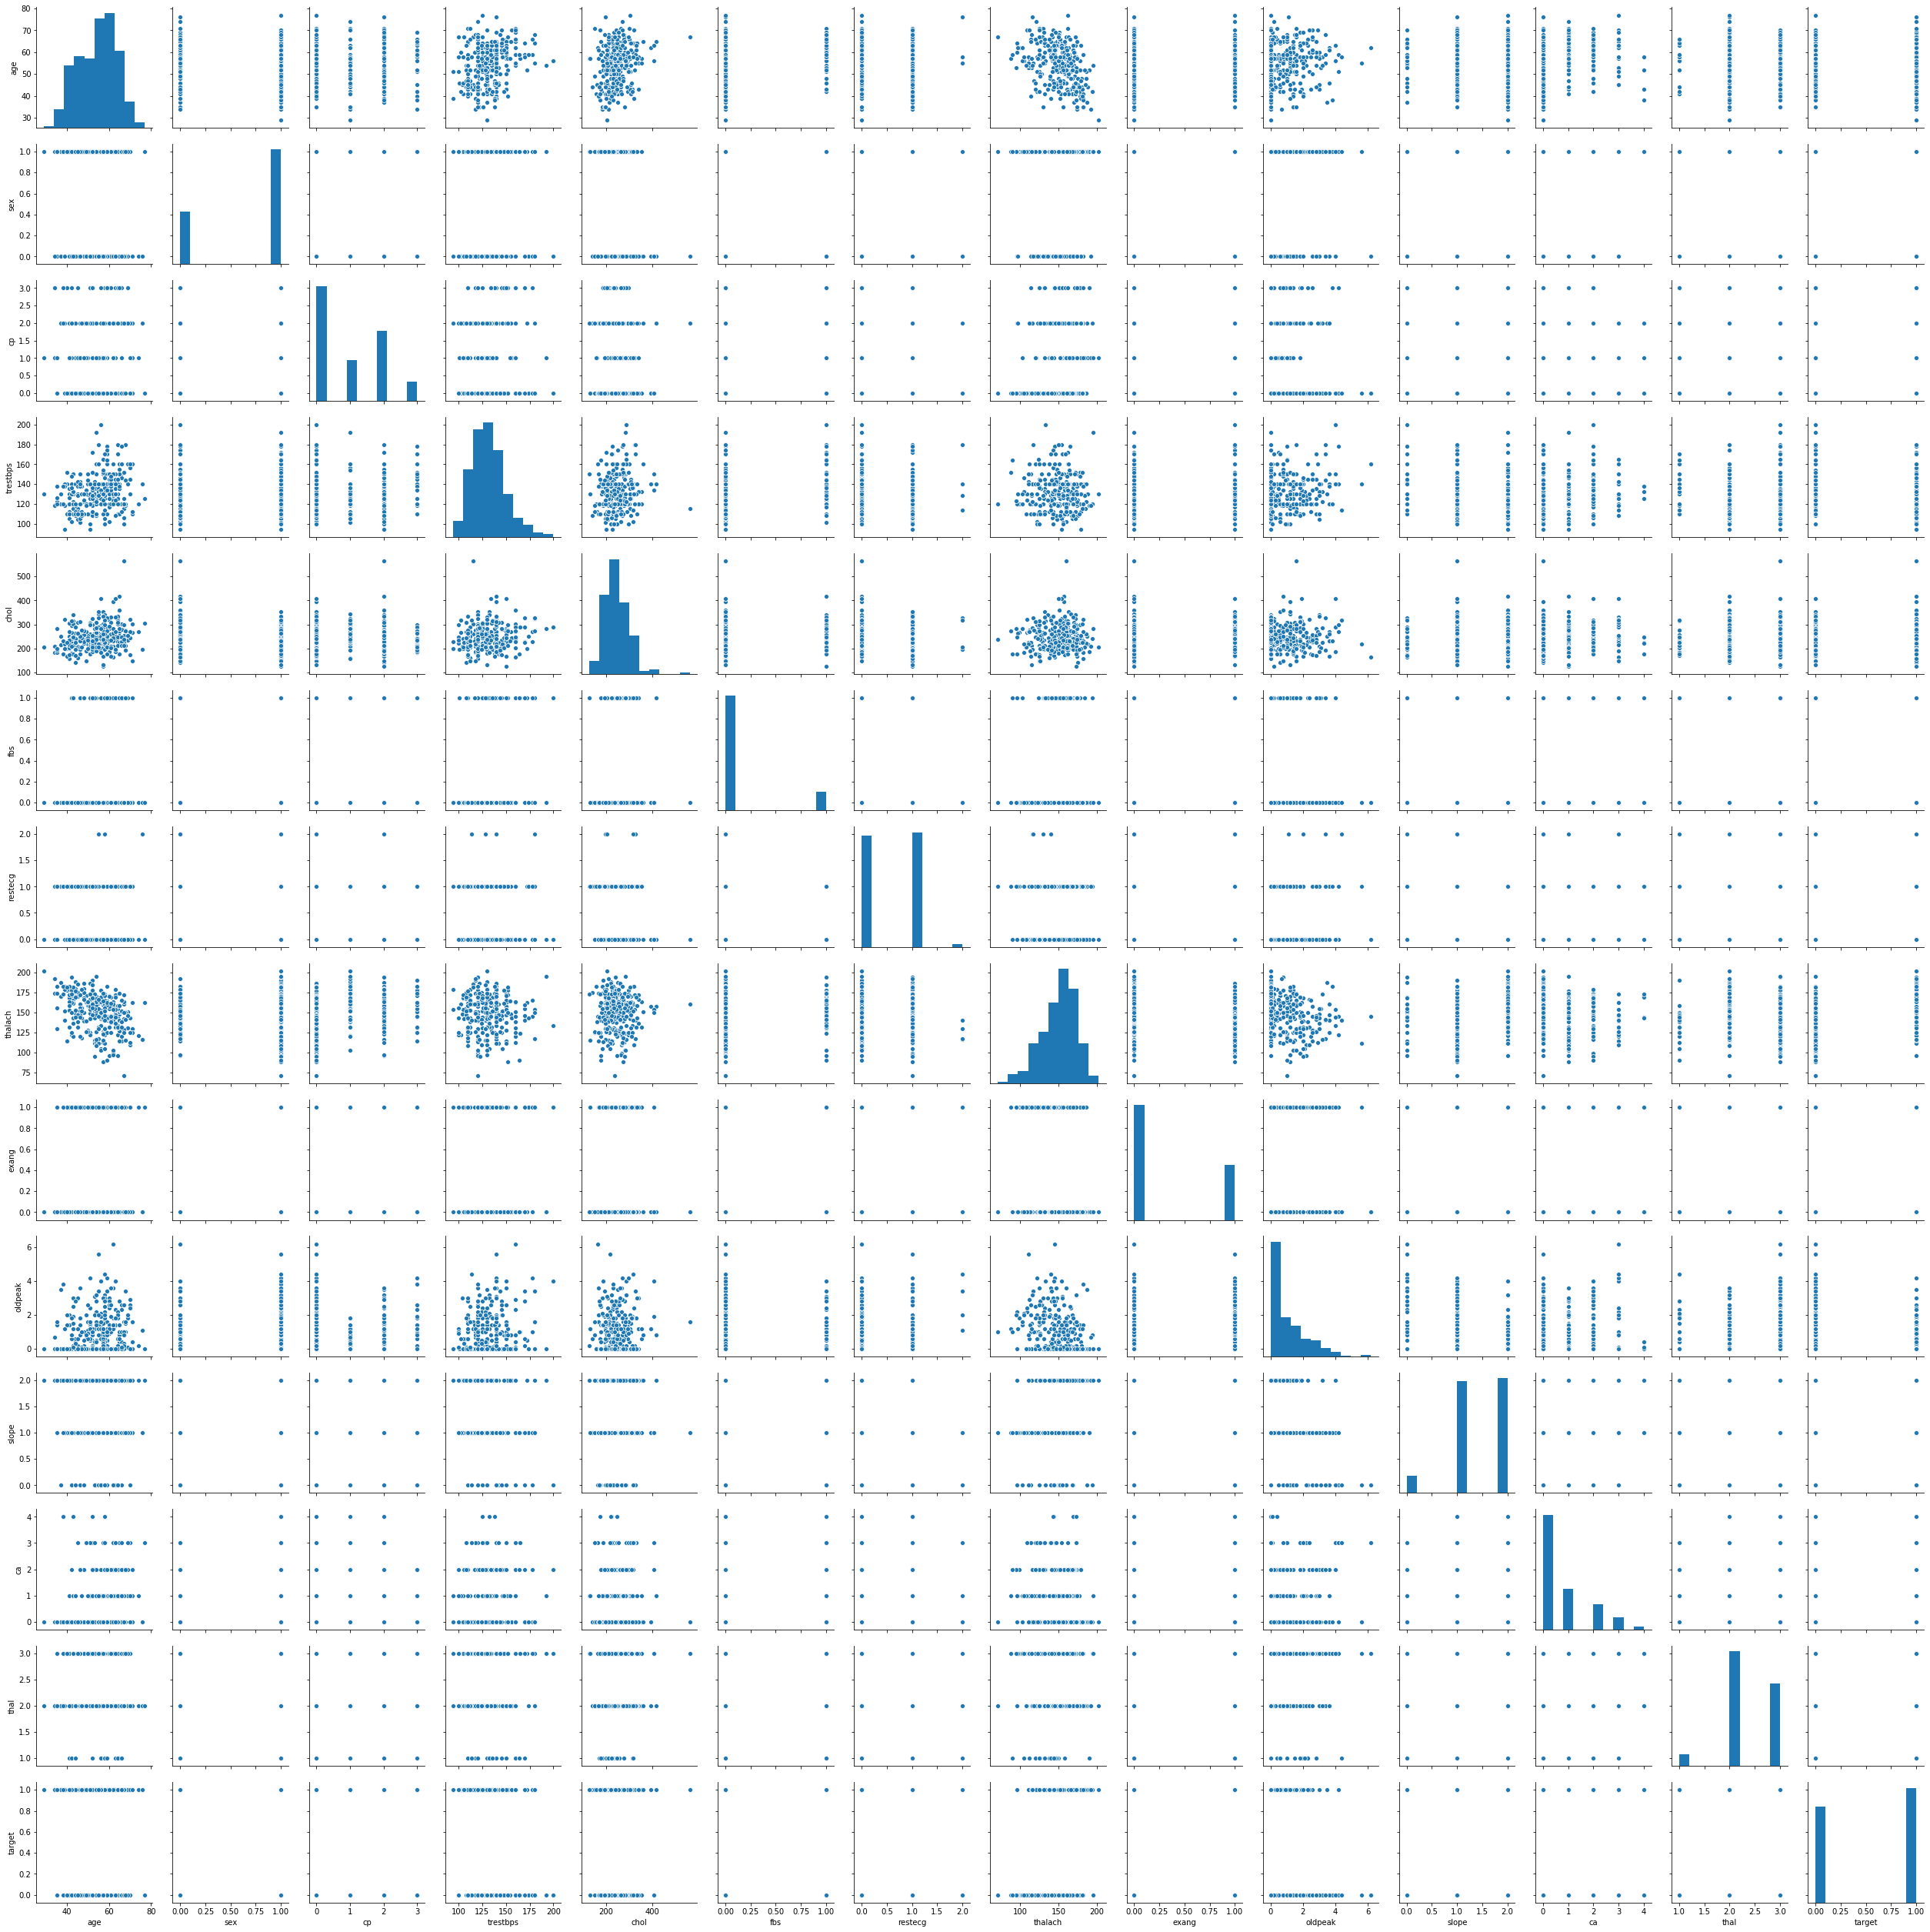

In [33]:
sns.pairplot(dataset)

**Conclusion**: The features which look to be the predictors for heart diseases are: **age, sex, thalach, exang and slope**.<br>
Older people, male, people who get an angina after exercising and who have a flat slope on their ECG have a higher probability to have heart diseases, according to this dataset. 

# Feature Selection

## Random Forest first check and comparison

### Using the entire dataset

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
X = dataset.drop('target',axis=1)
y = dataset['target']
print(X.shape,y.shape)

(296, 13) (296,)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [69]:
rfc = RandomForestClassifier(n_estimators=100)

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
predictions = rfc.predict(X_test)

The accuracy score is: 0.8166666666666667


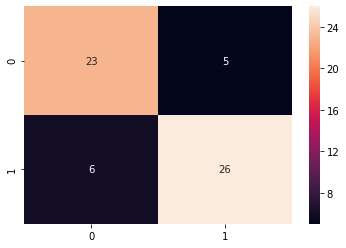

In [72]:
ac_score = accuracy_score(y_test,predictions)
print(f'The accuracy score is: {ac_score}')

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='d')

### Using the 5 best features dataset

#### Univariate Feature Selection

In [73]:
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
select_features = SelectKBest(score_func=chi2,k=5)

In [75]:
select_features.fit_transform(X,y)

array([[ 63,   3, 150,   0,   1],
       [ 37,   2, 187,   0,   2],
       [ 41,   1, 172,   0,   2],
       ...,
       [ 68,   0, 141,   2,   3],
       [ 57,   0, 115,   1,   3],
       [ 57,   1, 174,   1,   2]], dtype=int64)

In [76]:
dataset.columns[select_features.get_support(indices=True)]

Index(['age', 'sex', 'cp', 'trestbps', 'chol'], dtype='object')

In [77]:
dataset_best5Features = dataset[dataset.columns[select_features.get_support(indices=True)]]

In [78]:
dataset_best5Features = pd.concat(objs=[dataset_best5Features,dataset['target']],axis=1)

X = dataset_best5Features.drop('target',axis=1)
y = dataset_best5Features['target']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.20, random_state=42)

In [79]:
print(X_train.shape,X_test.shape)

(236, 5) (60, 5)


In [80]:
rfc = RandomForestClassifier(n_estimators=100)

In [81]:
rfc.fit(X_train_5,y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
predictions = rfc.predict(X_test_5)

The accuracy score is: 0.7166666666666667


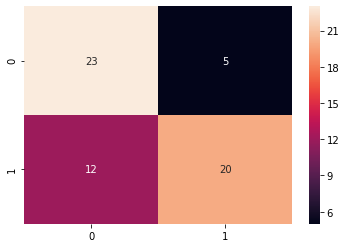

In [83]:
ac_score = accuracy_score(y_test_5,predictions)
print(f'The accuracy score is: {ac_score}')

cm = confusion_matrix(y_test_5,predictions)
sns.heatmap(cm,annot=True,fmt='d')

### Recursive Feature Elimination with Random Forest

In [84]:
from sklearn.feature_selection import RFE

In [85]:
rfc = RandomForestClassifier(n_estimators=100)

In [86]:
rfe = RFE(estimator=rfc,n_features_to_select=5,step=1)

In [87]:
rfe.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=5, step=1, verbose=0)

In [88]:
#Best 5 features
dataset.columns[rfe.get_support(indices=True)]

Index(['age', 'sex', 'cp', 'trestbps', 'chol'], dtype='object')

In [89]:
dataset_best5Features = dataset[dataset.columns[rfe.get_support(indices=True)]]

In [90]:
dataset_best5Features = pd.concat(objs=[dataset_best5Features,dataset['target']],axis=1)

X = dataset_best5Features.drop('target',axis=1)
y = dataset_best5Features['target']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.20, random_state=42)

The accuracy score is: 0.7666666666666667


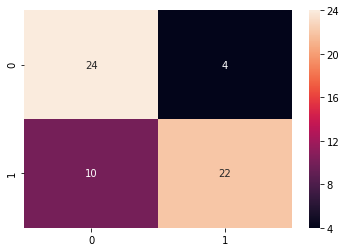

In [91]:
rfc.fit(X_train_5,y_train_5)
predictions = rfc.predict(X_test_5)

ac_score = accuracy_score(y_test_5,predictions)
print(f'The accuracy score is: {ac_score}')

cm = confusion_matrix(y_test_5,predictions)
sns.heatmap(cm,annot=True,fmt='d')

### Recursive Feature Elimination Cross-Validation

In [92]:
from sklearn.feature_selection import RFECV

In [93]:
rfc = RandomForestClassifier(n_estimators=100)

In [94]:
rfecv = RFECV(estimator=rfc,step=1,cv=10,scoring='accuracy')

In [95]:
rfecv.fit(X_train,y_train)

RFECV(cv=10,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [96]:
print('Number of optimal features: {}'.format(rfecv.n_features_))
dataset.columns[rfecv.get_support(indices=True)]

Number of optimal features: 5


Index(['age', 'sex', 'cp', 'trestbps', 'chol'], dtype='object')

In [97]:
dataset_optimized = dataset[dataset.columns[rfecv.get_support(indices=True)]]
dataset_optimized

,age,sex,cp,trestbps,chol
0,63,1,3,145,233
1,37,1,2,130,250
2,41,0,1,130,204
3,56,1,1,120,236
4,57,0,0,120,354
...,...,...,...,...,...
298,57,0,0,140,241
299,45,1,3,110,264
300,68,1,0,144,193
301,57,1,0,130,131


In [98]:
dataset_optimized = pd.concat(objs=[dataset_optimized,dataset['target']],axis=1)

X = dataset_optimized.drop('target',axis=1)
y = dataset_optimized['target']

X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X, y, test_size=0.20, random_state=42)

In [99]:
rfc.fit(X_train_opt,y_train_opt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
predictions = rfc.predict(X_test_opt)

The accuracy score is: 0.75


(2.5, -0.5)

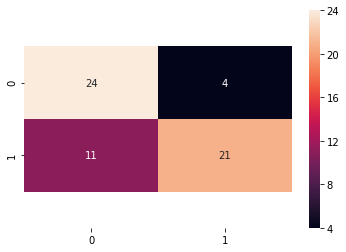

In [101]:
rfc.fit(X_train_opt,y_train_opt)
predictions = rfc.predict(X_test_opt)

ac_score = accuracy_score(y_test_opt,predictions)
print(f'The accuracy score is: {ac_score}')

cm = confusion_matrix(y_test_opt,predictions)
ax = sns.heatmap(cm,annot=True,fmt='d')
#bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Conclusion: which dataset to choose? We'll keep the entire dataset

# MLA

## Logistic Regression

In [102]:
X = dataset.drop('target',axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
log = LogisticRegression()

In [105]:
log.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
log_predictions = log.predict(X_test)

The accuracy score is: 0.8833333333333333


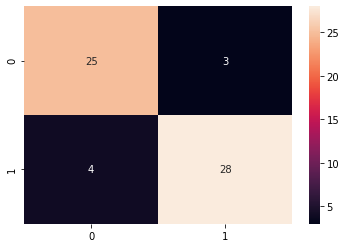

In [108]:
log_score = accuracy_score(y_test,log_predictions)
print(f'The accuracy score is: {log_score}')

cm = confusion_matrix(y_test,log_predictions)
sns.heatmap(cm,annot=True,fmt='d')

## SVM

In [109]:
from sklearn.svm import SVC

In [110]:
svm = SVC()

In [111]:
svm.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
svm_predictions = svm.predict(X_test)

The accuracy score is: 0.5333333333333333


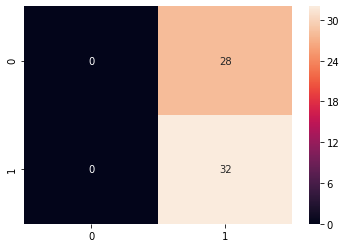

In [113]:
svm_score = accuracy_score(y_test,svm_predictions)
print(f'The accuracy score is: {svm_score}')

cm = confusion_matrix(y_test,svm_predictions)
sns.heatmap(cm,annot=True,fmt='d')

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3)

grid.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.544, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.544, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.551, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.544, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.544, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.551, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ..................... C=1000, gamma=1, score=0.551, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.544, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.557, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.564, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.608, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.544, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.603, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [116]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [117]:
grid_predictions = grid.predict(X_test)

The accuracy score is: 0.8666666666666667


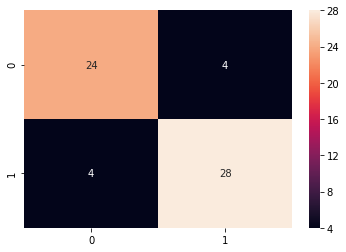

In [118]:
svmOpt_score = accuracy_score(y_test,grid_predictions)
print(f'The accuracy score is: {svmOpt_score}')

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm,annot=True,fmt='d')

## K-Nearest Neighbors

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(y_test != knn_predictions_i))

Text(0, 0.5, 'Error Rate')

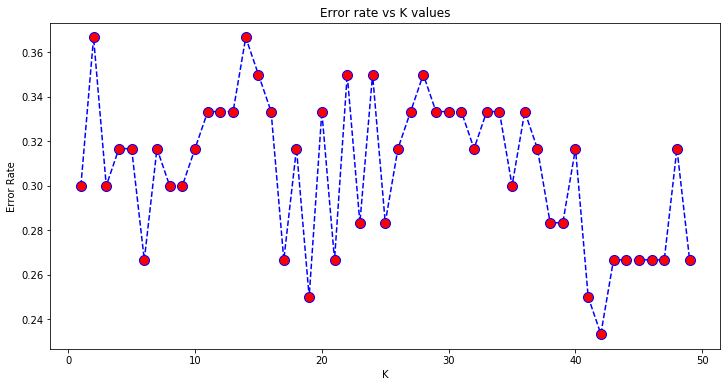

In [121]:
plt.figure(figsize=(12,6))

plt.plot(range(1,50),error_rate,linestyle='--',color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K values')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [122]:
#Best value K = 41
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

The accuracy score is: 0.75


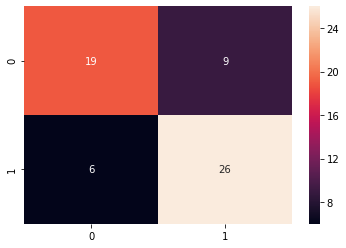

In [123]:
knn_score = accuracy_score(y_test,knn_predictions)
print(f'The accuracy score is: {knn_score}')

cm = confusion_matrix(y_test,knn_predictions)
sns.heatmap(cm,annot=True,fmt='d')

## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
tree = DecisionTreeClassifier()

In [126]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [127]:
tree_predictions = tree.predict(X_test)

The accuracy score is: 0.8


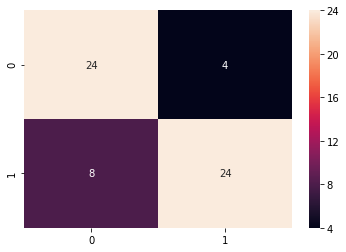

In [128]:
tree_score = accuracy_score(y_test,tree_predictions)
print(f'The accuracy score is: {tree_score}')

cm = confusion_matrix(y_test,tree_predictions)
sns.heatmap(cm,annot=True,fmt='d')

## Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(n_estimators=1000)

In [131]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
rfc_predictions = rfc.predict(X_test)

The accuracy score is: 0.8833333333333333


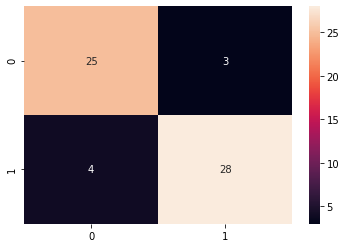

In [133]:
rfc_score = accuracy_score(y_test,rfc_predictions)
print(f'The accuracy score is: {rfc_score}')

cm = confusion_matrix(y_test,rfc_predictions)
sns.heatmap(cm,annot=True,fmt='d')

## XGBoost

In [144]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [137]:
xgb = XGBClassifier()

In [138]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
xgb_predictions = xgb.predict(X_test)

The accuracy score is: 0.8166666666666667


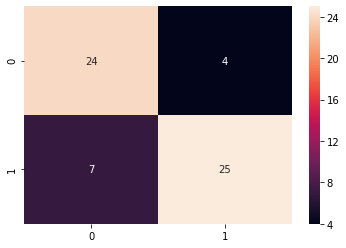

In [140]:
xgb_score = accuracy_score(y_test,xgb_predictions)
print(f'The accuracy score is: {xgb_score}')

cm = confusion_matrix(y_test,xgb_predictions)
sns.heatmap(cm,annot=True,fmt='d')

### Optimization

In [145]:
from sklearn import metrics
X = dataset.drop('target',axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

def modelfit(alg, useTrainCV=True, cv_folds=10, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_test)
    dtrain_predprob = alg.predict_proba(X_test)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print('Best iteration: {}'.format(cvresult.shape[0]))
        
    #All of this is for classification problems
    print("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtrain_predictions))
        
    plt.figure(figsize=(10,5))
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances (Based on fscores)')
    plt.ylabel('Feature Importance Score')


Model Report
Best iteration: 50
Accuracy : 0.8667


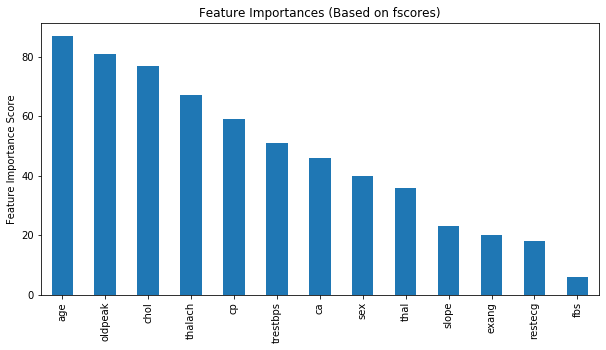

In [146]:
target = 'target'
predictors = [x for x in dataset.columns if x not in [target]]

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree = 0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb1)

### Max_depth and min_child_weight

In [147]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1.fit(dataset[predictors],dataset[target])
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.926543309631545)

**We go one step deeper to look for optimal values. We'll look for values 1 above and below the optimum values**

In [148]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(dataset[predictors],dataset[target])
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 6}, 0.9282098416289593)

**Optimum values: max_depth: 4 and min_child_weight: 6<br>
Trial for a bigger interval for min_child_weight**

In [149]:
param_test2b = {
 'min_child_weight':range(1,10,1)
}
gsearch2b = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=4,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2b.fit(dataset[predictors],dataset[target])
gsearch2b.best_params_, gsearch2b.best_score_

({'min_child_weight': 6}, 0.9282098416289593)

**Final optimum parameters:**<br>
- max_depth: 4<br>
- min_child_weight: 6<br>

In [150]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=50, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch3.fit(dataset[predictors],dataset[target])
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 0.9297551712992889)

**Final optimum value for gamma: 0.1**<br>
**We'll look for the best iteration given the parameters we got, so far**


Model Report
Best iteration: 48
Accuracy : 0.8667


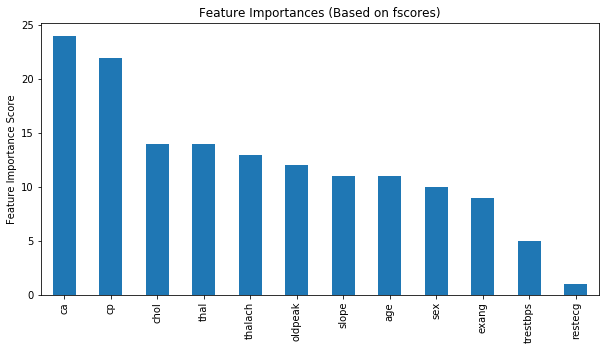

In [151]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=6,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree = 0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb2)

**Tune subsample and colsample_bytree**

In [152]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=48, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch4.fit(dataset[predictors],dataset[target])
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.8}, 0.9296521493212667)

**Optimum values for both: 0.8**<br>
**Now, we'll test smaller intervals around the optimum values we got**

In [153]:
param_test5 = {
 'subsample':[i/100.0 for i in range(70,90,5)],
 'colsample_bytree':[i/100.0 for i in range(80,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=48, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch5.fit(dataset[predictors],dataset[target])
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.85, 'subsample': 0.85}, 0.9314883645765999)

**Final optimum values for subsample and colsample_bytree: 0.85**<br>
**Tune Regularization parameters to reduce overfitting**<br>

In [154]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=48, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.85, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch6.fit(dataset[predictors],dataset[target])
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1e-05}, 0.9314883645765999)

**Optimum value for reg_alpha: 1e-05**<br>
**Trial for values around the optimum one**<br>

In [155]:
param_test7 = {
 'reg_alpha':[1e-8,1e-7,1e-6,1e-5,1e-4,1e-3]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=48, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.85, colsample_bytree=0.85,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch7.fit(dataset[predictors],dataset[target])
gsearch7.best_params_, gsearch7.best_score_

({'reg_alpha': 1e-08}, 0.9314883645765999)

**Final optimum value for reg_alpha: 1e-08**<br>
**Looking for a new best iteration given the parameters we got so far**


Model Report
Best iteration: 25
Accuracy : 0.8167


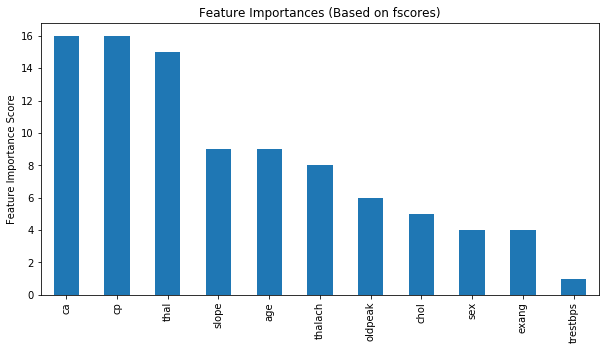

In [156]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=6,
    gamma=0.1,
    subsample=0.85,
    colsample_bytree = 0.85,
    reg_alpha=1e-08,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb3)

**Lastly, we decrease the learning_rate and increase the number of trees to look for a better score**


Model Report
Best iteration: 33
Accuracy : 0.85


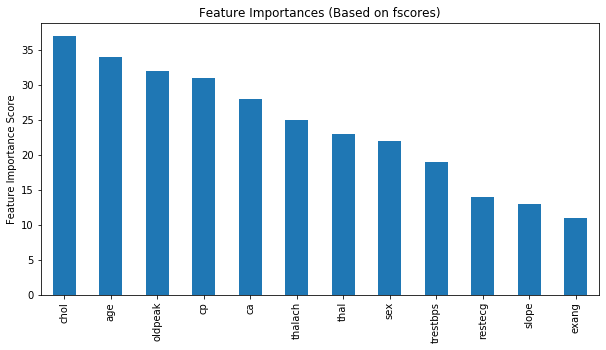

In [157]:
xgb4 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=2,
    gamma=0.1,
    subsample=0.85,
    colsample_bytree = 0.85,
    reg_alpha=1e-08,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27)

modelfit(xgb4)

##  Double check with the total dataset

In [158]:
xgb4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=2, missing=None, n_estimators=33, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1e-08, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.85, verbosity=1)

In [159]:
xgbOpt_predictions = xgb4.predict(X_test)

The accuracy score is: 0.85


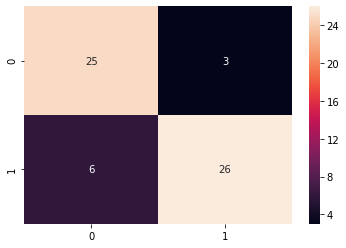

In [160]:
xgbOpt_score = accuracy_score(y_test,xgbOpt_predictions)
print(f'The accuracy score is: {xgbOpt_score}')

cm = confusion_matrix(y_test,xgbOpt_predictions)
sns.heatmap(cm,annot=True,fmt='d')

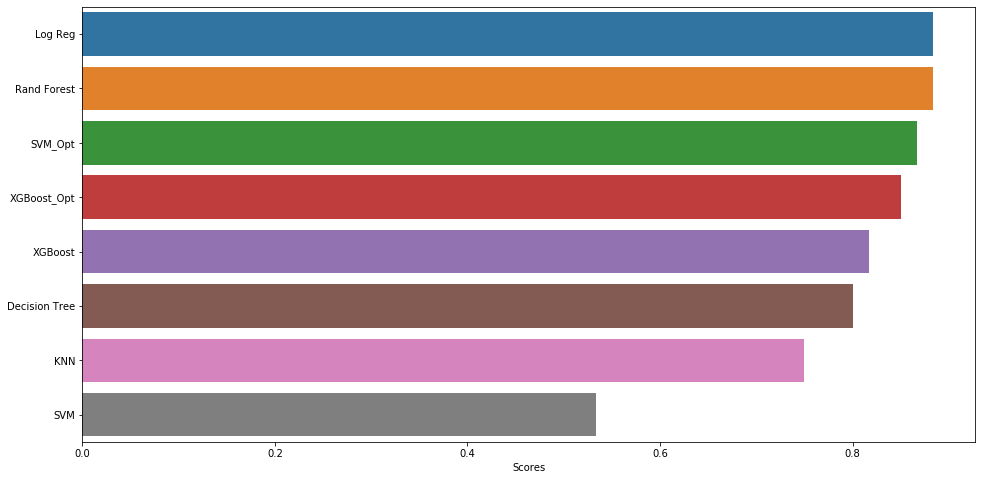

In [191]:
scores = [log_score,svm_score,svmOpt_score,knn_score,tree_score,rfc_score,xgb_score,xgbOpt_score]

df = pd.DataFrame(data=scores,columns=['Scores'],index=['Log Reg','SVM','SVM_Opt','KNN','Decision Tree',
                                                        'Rand Forest','XGBoost','XGBoost_Opt'])
df = df.sort_values(by='Scores',ascending=False)

plt.figure(figsize=(16,8))
sns.barplot(x='Scores',y=df.index,data=df)

### Conclusion: which Machine Learning Algorithm to choose? Random Forest and Logistic Regression give the best results. We'll go with Logistic Regression.

# Comprehensive ML

This section is to understand the predictions done by the algorithms using **comprehensive Machine Learning**

In [162]:
import eli5
from eli5.sklearn import PermutationImportance

In [201]:
perm = PermutationImportance(estimator=log,random_state=42).fit(X_test,y_test)

In [202]:
#Give the features which have the biggest impact on predictions
eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.0933 ± 0.0777,ca
0.0700 ± 0.0573,thalach
0.0667 ± 0.0596,sex
0.0467 ± 0.0389,cp
0.0233 ± 0.0163,slope
0.0233 ± 0.0340,exang
0.0067 ± 0.0163,chol
0.0033 ± 0.0442,thal
0.0033 ± 0.0133,trestbps
0 ± 0.0000,fbs


Here, we'll use **Partial Dependence Plots** which show how a feature affects predictions.

In [165]:
from pdpbox import pdp

In [166]:
base_features = dataset.columns.values.tolist()
base_features.remove('target')

In [199]:
feat_name = 'chol'
pdp_dist = pdp.pdp_isolate(model=log, dataset=X_test, model_features=base_features, feature=feat_name)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c8be2c08>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c886fc08>})

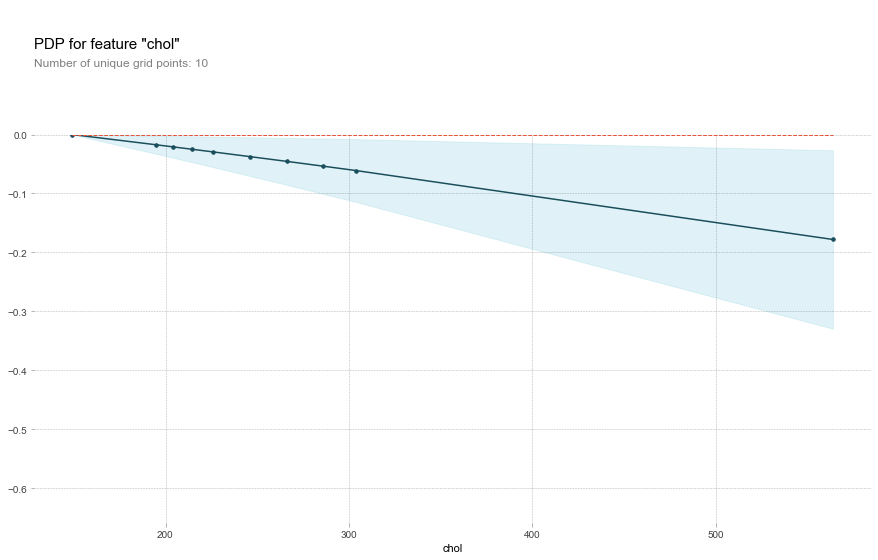

In [200]:
pdp.pdp_plot(pdp_dist, feat_name)

#### That's a bit weird, as cholesterol rate increases, the probability of getting heart diseases decreases.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c8b73ec8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c8bd8348>})

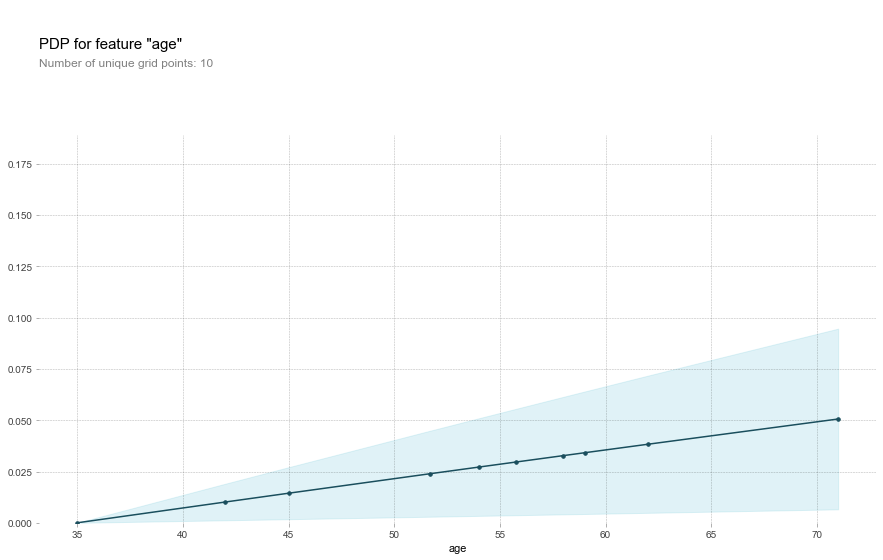

In [198]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=log, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)

#### Older one gets, higher the probability of getting a heart disease increases

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c878d548>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c8c8bac8>})

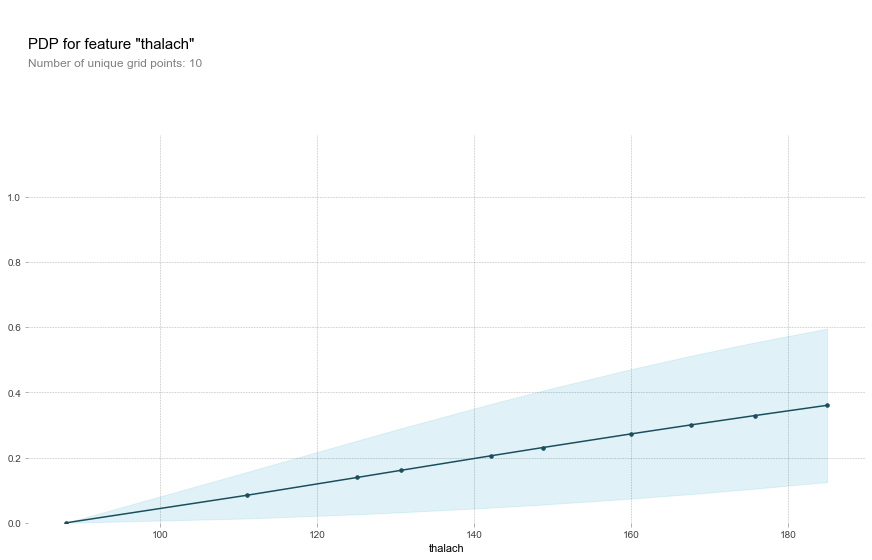

In [197]:
feat_name = 'thalach'
pdp_dist = pdp.pdp_isolate(model=log, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)

#### The higher the heart rate, the higher the probability of heart diseases

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c5406a48>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x233c5931988>})

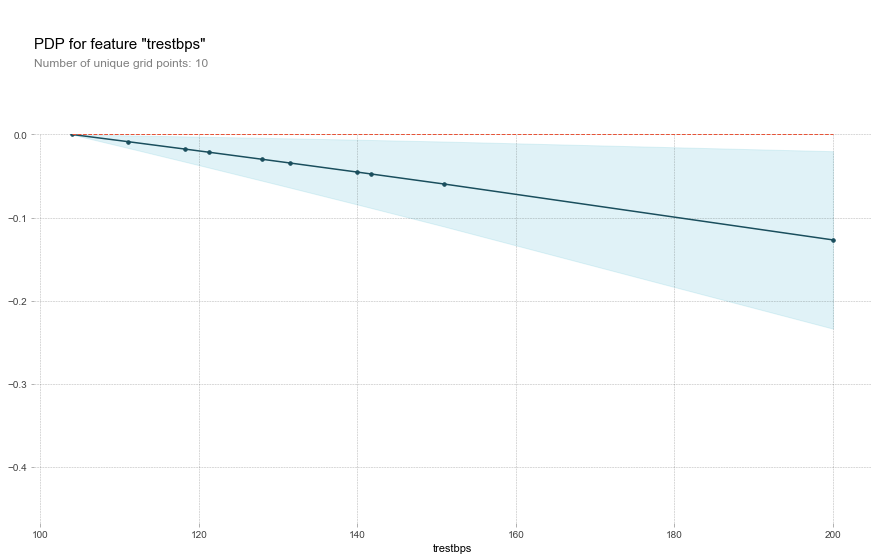

In [171]:
feat_name = 'trestbps'
pdp_dist = pdp.pdp_isolate(model=log, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)

#### That's a bit odd too, the higher the blood pressure, the smaller the probability of heart diseases

#### Now, let's pick out individuals and see how the different variables are affecting their probability of heart diseases<br>
Here we're using Random Forest predictions.

In [172]:
import shap

In [173]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [175]:
data_for_prediction = X_test.iloc[30,:]
heart_disease_risk_factors(rfc, data_for_prediction)

The prediction for this person of being sick is **very high** because the output value is very close to 0.<br>
The base value gives the mean of target prediction values.<br>
Many parameters are not working in his favor as sex (he's a male), he got an angina after exercising (exang =1), he got a flat slope on his ECG (slope = 1), he has an asymptomatic chest pain (cp = 0).

In [176]:
data_for_prediction = X_test.iloc[24,:]
heart_disease_risk_factors(rfc, data_for_prediction)

The prediction for this person of being sick is **extremly low** because the output value is equal to 1.<br>
Many parameters are not working in her favor as sex (she's a female), he didn't get an angina after exercising (exang = 0), she is young (age = 37), she didn't get a flat slope on his ECG (slope = 2), ...